The notebook was run on Google Colab.

# Getting the dataset

In [1]:
!sudo apt-get update -y
!sudo apt-get install python3.9 python3.9-venv python3.9-dev -y


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,811 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,336 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,275 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hi

In [2]:
!python3.9 -m venv py39


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

# Change directory to your project folder
project_path = "/content/drive/My Drive/Land-Cover-Semantic-Segmentation-PyTorch-main"
os.chdir(project_path)

# Check files
os.listdir()


['landcoverai.zip',
 'Dockerfile',
 'requirements.txt',
 'LICENSE',
 '.gitignore',
 '.DS_Store',
 'src',
 'notebooks',
 'assets',
 'config',
 'output',
 '.venv',
 'models',
 'data',
 'logs',
 '.github',
 'py39',
 'kaggle.json']

In [6]:

!sudo apt-get update -y
!sudo apt-get install python3.9 python3.9-venv python3.9-dev -y

# 2️⃣ Create a clean Python 3.9 virtual environment
!python3.9 -m venv /content/py39

# 3️⃣ Activate and upgrade pip inside it
!source /content/py39/bin/activate && pip install --upgrade pip setuptools wheel

# 4️⃣ Install all your dependencies from requirements.txt
!source /content/py39/bin/activate && pip install -r requirements.txt


Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [7]:
!pip install patchify

  Using cached patchify-0.2.3-py3-none-any.whl.metadata (3.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
Using cached patchify-0.2.3-py3-none-any.whl (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.

In [1]:
! pip install -q kaggle

In [2]:
# upload the .json file for your kaggle profile credentials
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srikanthakkaru","key":"68c10d1c457ecd877c619a1dab2044eb"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# ! kaggle datasets list

In [6]:
! kaggle datasets download -d adrianboguszewski/landcoverai

Dataset URL: https://www.kaggle.com/datasets/adrianboguszewski/landcoverai
License(s): CC-BY-NC-SA-4.0
100% 1.43G/1.43G [00:59<00:00, 227MB/s]
100% 1.43G/1.43G [00:59<00:00, 25.8MB/s]


In [ ]:
! kaggle datasets download -d balraj98/deepglobe-land-cover-classification-dataset


In [7]:
# ! rm -rf landcoverai

In [ ]:
# Extract LandCover.ai dataset locally (Python, not shell)
import os, zipfile
os.makedirs('data', exist_ok=True)
if os.path.exists('landcoverai.zip'):
    with zipfile.ZipFile('landcoverai.zip', 'r') as zf:
        zf.extractall('data')
    print('Extracted LandCover.ai to data/')
else:
    print("landcoverai.zip not found in current directory. Make sure the Kaggle download succeeded.")

Archive:  landcoverai.zip
  inflating: data/images/M-33-20-D-c-4-2.tif  
  inflating: data/images/M-33-20-D-d-3-3.tif  
  inflating: data/images/M-33-32-B-b-4-4.tif  
  inflating: data/images/M-33-48-A-c-4-4.tif  
  inflating: data/images/M-33-7-A-d-2-3.tif  
  inflating: data/images/M-33-7-A-d-3-2.tif  
  inflating: data/images/M-34-32-B-a-4-3.tif  
  inflating: data/images/M-34-32-B-b-1-3.tif  
  inflating: data/images/M-34-5-D-d-4-2.tif  
  inflating: data/images/M-34-51-C-b-2-1.tif  
  inflating: data/images/M-34-51-C-d-4-1.tif  
  inflating: data/images/M-34-55-B-b-4-1.tif  
  inflating: data/images/M-34-56-A-b-1-4.tif  
  inflating: data/images/M-34-6-A-d-2-2.tif  
  inflating: data/images/M-34-65-D-a-4-4.tif  
  inflating: data/images/M-34-65-D-c-4-2.tif  
  inflating: data/images/M-34-65-D-d-4-1.tif  
  inflating: data/images/M-34-68-B-a-1-3.tif  
  inflating: data/images/M-34-77-B-c-2-3.tif  
  inflating: data/images/N-33-104-A-c-1-1.tif  
  inflating: data/images/N-33-119-C-c

In [ ]:
# Download and extract DeepGlobe Land Cover dataset via Kaggle
import os, zipfile, glob
DEEPGLOBE_SLUG = os.environ.get('DEEPGLOBE_SLUG', 'zfturbo/deepglobe-land-cover-classification-dataset')  # change if needed
os.makedirs('data', exist_ok=True)
ret = os.system(f"kaggle datasets download -d {DEEPGLOBE_SLUG} -p data")
if ret != 0:
    print("Kaggle download for DeepGlobe failed. Set DEEPGLOBE_SLUG to a valid Kaggle dataset slug or manually place the zip under data/.")
else:
    os.makedirs('data/deepglobe', exist_ok=True)
    for zp in glob.glob('data/*.zip'):
        try:
            with zipfile.ZipFile(zp, 'r') as zf:
                zf.extractall('data/deepglobe')
                print(f'Extracted {os.path.basename(zp)} to data/deepglobe')
        except zipfile.BadZipFile:
            print(f'Skipped non-zip or bad file: {zp}')

In [ ]:
# Convert DeepGlobe masks to LandCoverAI-compatible class indices
import cv2, numpy as np, shutil
from pathlib import Path
deepglobe_raw = Path('data/deepglobe')
# Try to guess image/mask folders; adjust if needed
dg_img_dir_candidates = [p for p in deepglobe_raw.rglob('*') if p.is_dir() and p.name.lower() in ('images','img','train','train_images')]
dg_mask_dir_candidates = [p for p in deepglobe_raw.rglob('*') if p.is_dir() and p.name.lower() in ('masks','mask','train_labels','labels')]
print('Guessed image dirs:', dg_img_dir_candidates[:3])
print('Guessed mask dirs:', dg_mask_dir_candidates[:3])
if not dg_img_dir_candidates or not dg_mask_dir_candidates:
    print('Please set dg_img_dir and dg_mask_dir manually to the correct DeepGlobe folders.')
dg_img_dir = dg_img_dir_candidates[0] if dg_img_dir_candidates else deepglobe_raw
dg_mask_dir = dg_mask_dir_candidates[0] if dg_mask_dir_candidates else deepglobe_raw
out_root = Path('data/deepglobe_converted')
(out_root/'images').mkdir(parents=True, exist_ok=True)
(out_root/'masks').mkdir(parents=True, exist_ok=True)

# Configure mapping from DeepGlobe class ids to LandCoverAI ids
# LandCoverAI classes: 0=background,1=building,2=woodland,3=water,4=road
# DeepGlobe (example) ids vary by distribution. Update mapping after verifying unique ids/colors.
DG_TO_LCAI = {
    # Populate with your verified mapping; defaults below send most classes to background
    0: 0,  # unknown -> background
    1: 1,  # urban/built-up -> building (verify)
    2: 0,  # agriculture -> background (or another LCAI class if you add it)
    3: 0,  # rangeland -> background
    4: 2,  # forest -> woodland
    5: 3,  # water -> water
    6: 0,  # barren -> background
}

def convert_mask_to_lcai(mask_path: Path, out_path: Path):
    m = cv2.imread(str(mask_path), cv2.IMREAD_UNCHANGED)
    if m is None:
        return False
    # If RGB palette masks, convert to single-channel id using a provided RGB->id mapping if available
    if m.ndim == 3 and m.shape[2] == 3:
        # Attempt to convert by mapping unique colors to ids if a color map is provided (not provided here).
        # Fallback: use grayscale conversion and treat values as ids.
        m = cv2.cvtColor(m, cv2.COLOR_BGR2GRAY)
    # Map ids
    unique_vals = np.unique(m)
    out = np.zeros_like(m, dtype=np.uint8)
    for uid in unique_vals:
        out[m == uid] = DG_TO_LCAI.get(int(uid), 0)
    cv2.imwrite(str(out_path), out)
    return True

# Copy images and converted masks
copied = 0
for fname in os.listdir(dg_img_dir):
    src_img = dg_img_dir/fname
    src_msk = dg_mask_dir/fname
    if not src_img.is_file() or not src_msk.is_file():
        continue
    shutil.copy2(src_img, out_root/'images'/fname)
    convert_mask_to_lcai(src_msk, out_root/'masks'/fname)
    copied += 1
print(f'Prepared {copied} DeepGlobe image/mask pairs under {out_root}')

In [ ]:
# Patchify DeepGlobe (converted) just like LandCover.ai
from patchify import patchify
from pathlib import Path
import cv2, os
deepglobe_conv = Path('data/deepglobe_converted')
dg_img_dir = deepglobe_conv/'images'
dg_mask_dir = deepglobe_conv/'masks'
dg_patches_img = Path(base_path)/f'patches_{tile_dimension}'/'images_dg'
dg_patches_msk = Path(base_path)/f'patches_{tile_dimension}'/'masks_dg'
dg_patches_img.mkdir(parents=True, exist_ok=True)
dg_patches_msk.mkdir(parents=True, exist_ok=True)

def create_patches_dir(src_dir, out_dir, tile_size):
  for file_name in os.listdir(src_dir):
    if file_name.endswith('.tif') or file_name.endswith('.png') or file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
      img = cv2.imread(os.path.join(src_dir, file_name), cv2.IMREAD_UNCHANGED)
      if img is None:
        continue
      if img.ndim == 2:
        # masks
        h, w = img.shape[:2]
        max_h = (h // tile_size) * tile_size
        max_w = (w // tile_size) * tile_size
        img = img[:max_h, :max_w]
        patches = patchify(img, (tile_size, tile_size), step=tile_size)
        for i in range(patches.shape[0]):
          for j in range(patches.shape[1]):
            patch = patches[i, j, :, :]
            cv2.imwrite(os.path.join(out_dir, file_name.replace('.tif', f'_patch_{i}_{j}.tif')), patch)
      else:
        # images (H, W, C)
        h, w = img.shape[:2]
        max_h = (h // tile_size) * tile_size
        max_w = (w // tile_size) * tile_size
        img = img[:max_h, :max_w]
        patches = patchify(img, (tile_size, tile_size, img.shape[2]), step=tile_size)
        for i in range(patches.shape[0]):
          for j in range(patches.shape[1]):
            patch = patches[i, j, 0, :, :, :]
            cv2.imwrite(os.path.join(out_dir, file_name.replace('.tif', f'_patch_{i}_{j}.tif')), patch)

print('Patchifying DeepGlobe images...')
create_patches_dir(str(dg_img_dir), str(dg_patches_img), tile_dimension)
print('Patchifying DeepGlobe masks...')
create_patches_dir(str(dg_mask_dir), str(dg_patches_msk), tile_dimension)
print('DeepGlobe patching done.')

In [ ]:
# Merge LandCover.ai and DeepGlobe patches into a combined dataset
import shutil, os
from pathlib import Path
combined_root = Path(base_path)/f'patches_{tile_dimension}'/'combined'
combined_img = combined_root/'images'
combined_msk = combined_root/'masks'
combined_img.mkdir(parents=True, exist_ok=True)
combined_msk.mkdir(parents=True, exist_ok=True)

def copy_all(src_dir, dst_dir):
    for fname in os.listdir(src_dir):
        s = os.path.join(src_dir, fname)
        d = os.path.join(dst_dir, fname)
        if os.path.isfile(s):
            shutil.copy2(s, d)

# Copy LandCover patches
copy_all(processed_image_dir, str(combined_img))
copy_all(processed_mask_dir, str(combined_msk))

# Copy DeepGlobe patches
copy_all(str(dg_patches_img), str(combined_img))
copy_all(str(dg_patches_msk), str(combined_msk))

print('Combined patches ready at:', combined_root)

# Visualizing the dataset

Image and Mask filename: M-33-20-D-c-4-2.tif

Image shape: (9636, 9095, 3)



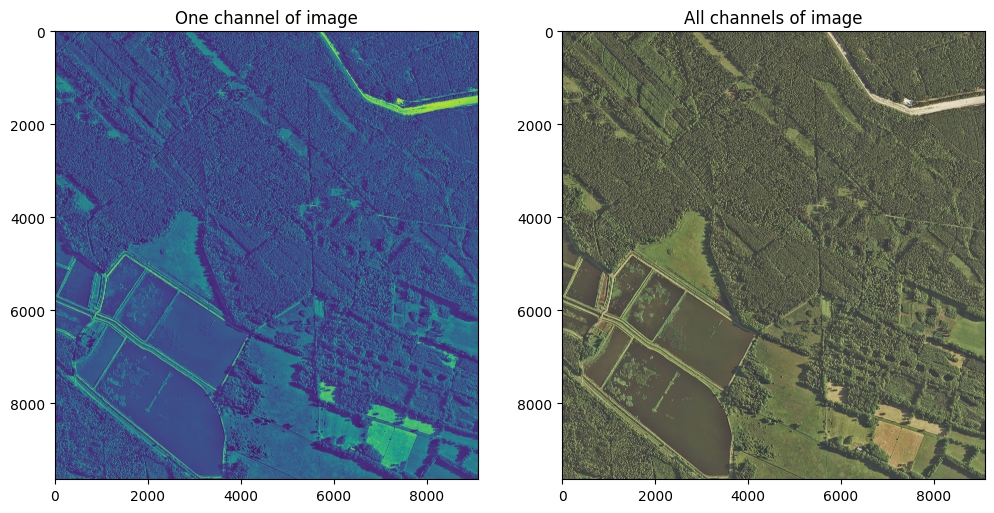


Mask shape: (9636, 9095)

Classes are:  [0 1 2 3 4]  and the counts are:  [18008335    46512 59476087  9553859   554627]



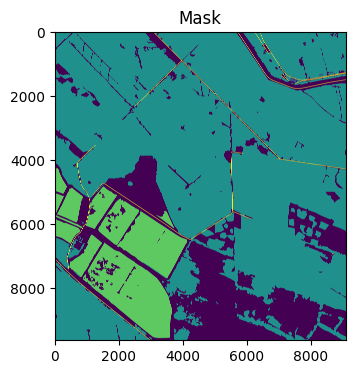

In [ ]:
# Visualizing the dataset
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Image and Mask filename: M-33-20-D-c-4-2.tif")
print()
sample_image = cv2.imread("data/images/M-33-20-D-c-4-2.tif", 1) # 3 channels / spectral bands
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
print("Image shape:", sample_image.shape)
print()

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(sample_image[:,:,0])
plt.title("One channel of image")
plt.subplot(122)
plt.imshow(sample_image)
plt.title("All channels of image")
plt.show()
print()

sample_mask = cv2.imread("data/masks/M-33-20-D-c-4-2.tif") # 3 channels but all same. Can also read with cv2.imread(path, 0) to get only one channel.
print("Mask shape:", sample_mask[:,:,0].shape)
print()
label_values, frequency_count = np.unique(sample_mask[:,:,0], return_counts=True) # Visualize only one channel. All chanels are identical.
print("Classes are: ", label_values, " and the counts are: ", frequency_count)
print()

plt.figure(figsize=(6, 4))
plt.imshow(sample_mask[:,:,0])
plt.title("Mask")
plt.show()
print()

# Model Training

In [ ]:
# Patching the images
from patchify import patchify
from PIL import Image

base_path = "data"

image_folder = os.path.join(base_path, "images")
mask_folder = os.path.join(base_path, "masks")

tile_dimension = 512

processed_image_dir = os.path.join(f"patches_{tile_dimension}", "images")
processed_image_dir = os.path.join(base_path, processed_image_dir)
os.makedirs(processed_image_dir, exist_ok=True)
processed_mask_dir = os.path.join(f"patches_{tile_dimension}", "masks")
processed_mask_dir = os.path.join(base_path, processed_mask_dir)
os.makedirs(processed_mask_dir, exist_ok=True)


def create_patches(source_directory, output_directory, tile_size):
  for file_name in os.listdir(source_directory):
    if file_name.endswith('.tif'):
      image_data = cv2.imread(os.path.join(source_directory, file_name), 1)
      adjusted_height = (image_data.shape[0] // tile_size) * tile_size
      adjusted_width = (image_data.shape[1] // tile_size) * tile_size
      image_data = image_data[0:adjusted_height, 0:adjusted_width]
      print(f"Patchifying {file_name}...")
      image_tiles = patchify(image_data, (tile_size, tile_size, 3), step = tile_size)  # non-overlapping
      print("Patches shape:", image_tiles.shape)
      for row_idx in range(image_tiles.shape[0]):
        for col_idx in range(image_tiles.shape[1]):
          individual_tile = image_tiles[row_idx, col_idx, 0, :, :] # the 0 is an extra unncessary dimension added by patchify for multiple channels scenario
          cv2.imwrite(os.path.join(output_directory, file_name.replace(".tif", f"_patch_{row_idx}_{col_idx}.tif")), individual_tile)

print()
print("Dividing images into patches...")
create_patches(image_folder, processed_image_dir, tile_dimension)
print("Dividing images into patches completed successfull!")

print()
print("Dividing masks into patches...")
create_patches(mask_folder, processed_mask_dir, tile_dimension)
print("Dividing masks into patches completed successfull!")


Dividing images into patches...
Patchifying N-34-66-C-c-4-3.tif...
Patches shape: (9, 8, 1, 512, 512, 3)
Patchifying N-33-60-D-d-1-2.tif...
Patches shape: (9, 8, 1, 512, 512, 3)
Patchifying M-33-20-D-d-3-3.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying N-33-139-C-d-2-2.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying M-34-51-C-b-2-1.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying N-33-119-C-c-3-3.tif...
Patches shape: (9, 8, 1, 512, 512, 3)
Patchifying N-34-77-A-b-1-4.tif...
Patches shape: (18, 16, 1, 512, 512, 3)
Patchifying N-33-130-A-d-3-3.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying M-34-51-C-d-4-1.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying N-33-139-D-c-1-3.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying M-33-20-D-c-4-2.tif...
Patches shape: (18, 17, 1, 512, 512, 3)
Patchifying N-34-97-D-c-2-4.tif...
Patches shape: (9, 8, 1, 512, 512, 3)
Patchifying M-34-77-B-c-2-3.tif...
Patches shape: (18, 17, 1, 512, 512,

In [ ]:
print(len(os.listdir(processed_image_dir)))
print(len(os.listdir(processed_mask_dir)))

10674
10674


In [ ]:
def filter_background_patches(image_patch_dir, mask_patch_dir):
  for file_name in os.listdir(mask_patch_dir):
    image_file_path = os.path.join(image_patch_dir, file_name)
    mask_file_path = os.path.join(mask_patch_dir, file_name)
    image_data = cv2.imread(image_file_path)
    mask_data = cv2.imread(mask_file_path)
    label_values, frequency_counts = np.unique(mask_data, return_counts = True)
    # If background class occupies more than 95% of the image, discard the image and mask
    if (frequency_counts[0] / frequency_counts.sum()) > 0.95:
      os.remove(image_file_path)
      os.remove(mask_file_path)

filter_background_patches(processed_image_dir, processed_mask_dir)

In [ ]:
print(len(os.listdir(processed_image_dir)))
print(len(os.listdir(processed_mask_dir)))

7053
7053


In [16]:
!pip install split-folders


  Using cached split_folders-0.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [ ]:
import splitfolders  # or import split_folders

# Use combined patches root for split
source_directory = str(combined_root)
print('Splitting from:', source_directory)
destination_directory = os.path.join(base_path, "train_val_test")
print(destination_directory)

os.makedirs(destination_directory, exist_ok=True)

# Split with a ratio.
# To split into training, validation, and testing set, set a tuple to `ratio`, i.e, `(.8, .1, .1)`.
splitfolders.ratio(source_directory, output=destination_directory, seed=42, ratio=(.8, .2), group_prefix=None, move=False) # splitting in training and validation only

training_directory = os.path.join(destination_directory, "train")
validation_directory = os.path.join(destination_directory, "val")
# test_dir = os.path.join(destination_directory, "test")

data/patches_512/
data/train_val_test


Copying files: 14106 files [00:26, 523.77 files/s] 


In [ ]:
train_image_path = os.path.join(training_directory, "images")
train_mask_path = os.path.join(training_directory, "masks")

val_image_path = os.path.join(validation_directory, "images")
val_mask_path = os.path.join(validation_directory, "masks")

In [19]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class LandCoverDataset(Dataset):

    """
    landcover.ai dataset. Read images, apply augmentation and preprocessing transformations.

    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing
            (e.g. noralization, shape manipulation, etc.)
    """

    LABEL_NAMES = ['background', 'building', 'woodland', 'water', 'road']

    def __init__(
            self,
            images_dir,
            masks_dir,
            classes=None,
            augmentation=None,
            preprocessing=None,
    ):
        self.file_identifiers = os.listdir(images_dir)
        self.image_paths = [os.path.join(images_dir, file_id) for file_id in self.file_identifiers]
        self.mask_paths = [os.path.join(masks_dir, file_id) for file_id in self.file_identifiers]

        # convert str names to class values on masks
        self.target_classes = [self.LABEL_NAMES.index(cls.lower()) for cls in classes]

        self.data_augmentation = augmentation
        self.data_preprocessing = preprocessing

    def __getitem__(self, index):

        # read data
        input_image = cv2.imread(self.image_paths[index])
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        input_image = input_image / 255
        ground_truth_mask = cv2.imread(self.mask_paths[index], 0)

        # extract certain classes from mask (e.g. cars)
        binary_masks = [(ground_truth_mask == class_val) for class_val in self.target_classes]
        ground_truth_mask = np.stack(binary_masks, axis=-1).astype('float')

        # apply augmentations
        if self.data_augmentation:
            augmented_sample = self.data_augmentation(image=input_image, mask=ground_truth_mask)
            input_image, ground_truth_mask = augmented_sample['image'], augmented_sample['mask']

        # apply preprocessing
        if self.data_preprocessing:
            processed_sample = self.data_preprocessing(image=input_image, mask=ground_truth_mask)
            input_image, ground_truth_mask = processed_sample['image'], processed_sample['mask']

        return input_image, ground_truth_mask

    def __len__(self):
        return len(self.file_identifiers)

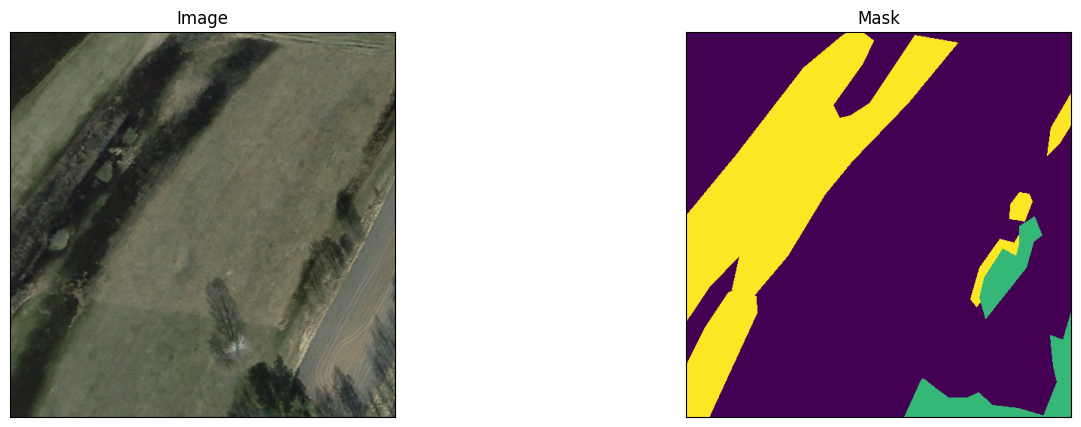

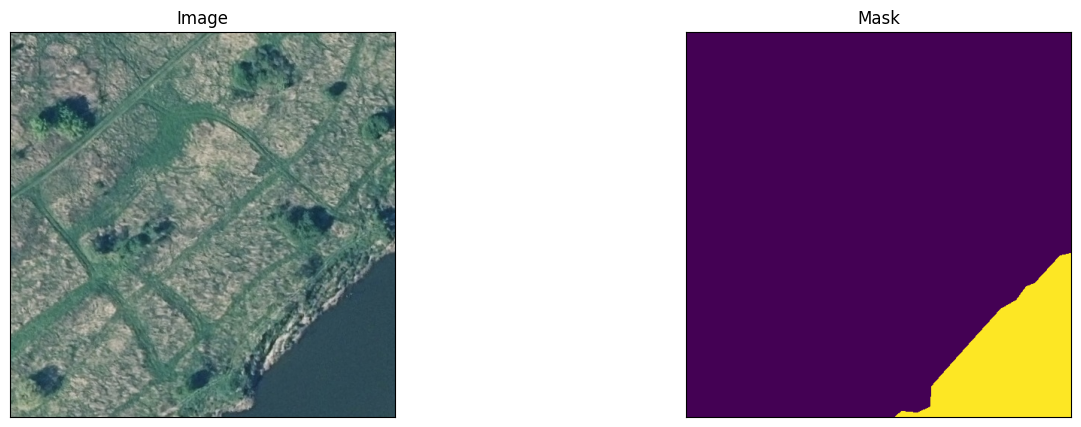

In [ ]:
# Visualizing all classes in the mask
sample_dataset = LandCoverDataset(train_image_path, train_mask_path, classes=['background', 'building', 'woodland', 'water', 'road'])
sample_image, sample_mask = sample_dataset[4] # get some sample
visualize(
    image = sample_image,
    # Convert the predicted one-hot encoded mask back to normal
    mask = np.argmax(sample_mask, axis=2)
)

# Visualizing selected classes in the mask
filtered_dataset = LandCoverDataset(train_image_path, train_mask_path, classes=['background', 'water', 'woodland'])
filtered_image, filtered_mask = filtered_dataset[16] # get some sample
visualize(
    image = filtered_image,
    # Convert the predicted one-hot encoded mask back to normal
    mask = np.argmax(filtered_mask, axis=2)
)

In [ ]:
import albumentations as album

def create_augmentation_pipeline():
    augmentation_transforms = [
        album.HorizontalFlip(p=0.5),
        album.VerticalFlip(p=0.5),
        # album.ShiftScaleRotate(scale_limit=1.5, rotate_limit=45, shift_limit=0.1, p=1, border_mode=0),
        # album.GaussNoise(p=0.2),
        # album.Perspective(p=0.5),
        # album.OneOf(
        #     [
        #         album.CLAHE(p=1),
        #         album.RandomBrightnessContrast(p=1),
        #         album.RandomGamma(p=1),
        #     ],
        #     p=0.9,
        # ),
        # album.OneOf(
        #     [
        #         album.Sharpen(p=1),
        #         album.Blur(blur_limit=3, p=1),
        #         album.MotionBlur(blur_limit=3, p=1),
        #     ],
        #     p=0.9,
        # ),
    ]
    return album.Compose(augmentation_transforms)


def convert_to_tensor(data_array, **kwargs):
    return data_array.transpose(2, 0, 1).astype('float32')


def create_preprocessing_pipeline(normalization_function):
    """Construct preprocessing transform

    Args:
        normalization_function (callbale): data normalization function
            (can be specific for each pretrained neural network)
    Return:
        transform: albummentations.Compose

    """
    preprocessing_steps = [
        album.Lambda(image=normalization_function),
        album.Lambda(image=convert_to_tensor, mask=convert_to_tensor),
    ]
    return album.Compose(preprocessing_steps)

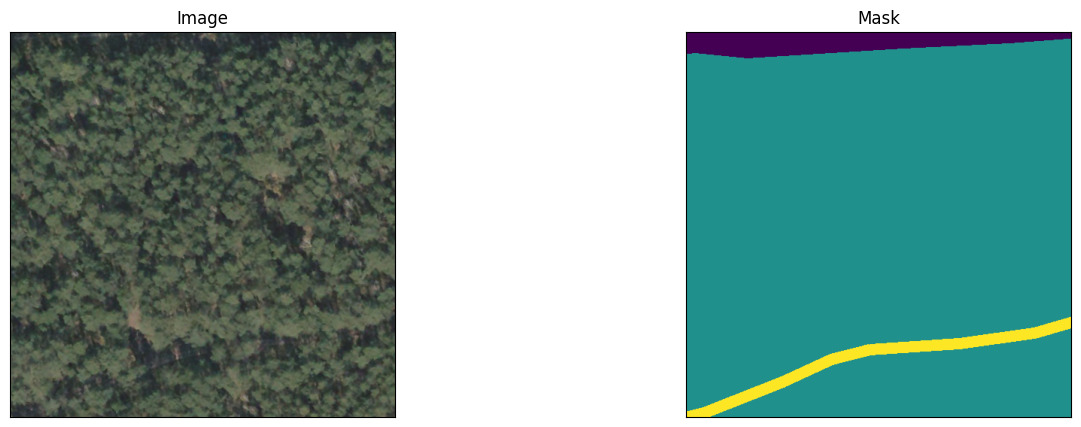

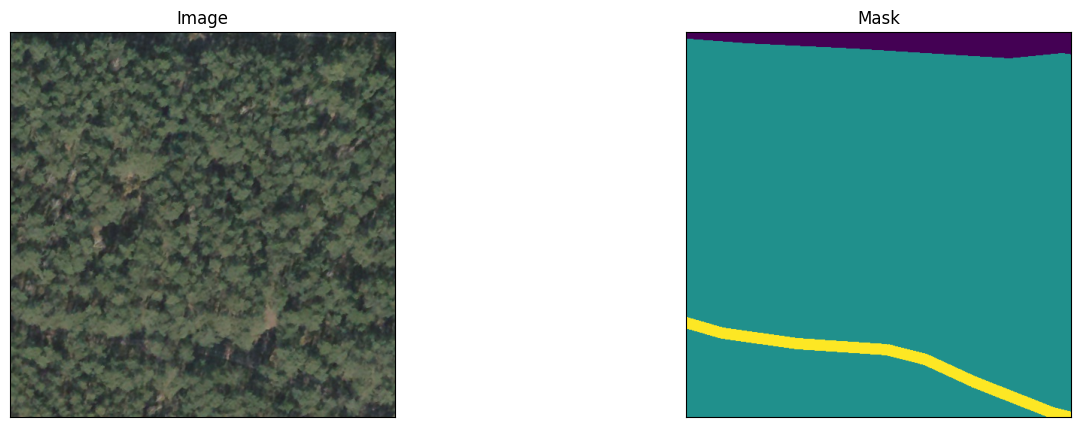

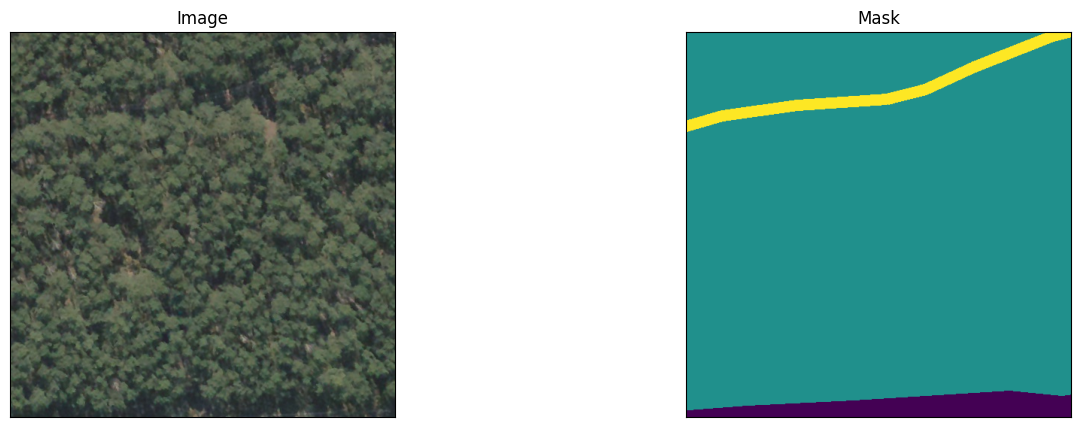

In [ ]:
# Visualize resulted augmented images and masks

augmented_dataset = LandCoverDataset(
    train_image_path,
    train_mask_path,
    augmentation=create_augmentation_pipeline(),
    classes=['background', 'building', 'woodland', 'water', 'road'],
)

# Same image with different random transforms
for iteration in range(3):
    augmented_image, augmented_mask = augmented_dataset[5123]
    visualize(image=augmented_image, mask=np.argmax(augmented_mask, axis=2))

In [25]:
!pip install segmentation-models-pytorch timm torchvision --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 5.2 MB/s eta 0:00:00


In [ ]:
import torch
import segmentation_models_pytorch as smp
import segmentation_models_pytorch.utils

MINI_BATCH_SIZE = 16
BACKBONE_MODEL = 'efficientnet-b0'
PRETRAINED_WEIGHTS = 'imagenet'
TARGET_LABELS = ['background', 'building', 'woodland', 'water']   # not training on 'road' class since it's instances in the data is too less
OUTPUT_ACTIVATION = 'softmax2d'    # could be None for logits or 'softmax2d' for multiclass segmentation
COMPUTE_DEVICE = 'cuda'
TOTAL_EPOCHS = 50

# create segmentation model with pretrained encoder
segmentation_model = smp.Unet(
    encoder_name=BACKBONE_MODEL,
    encoder_weights=PRETRAINED_WEIGHTS,
    classes=len(TARGET_LABELS),
    activation=OUTPUT_ACTIVATION,
)

normalization_function = smp.encoders.get_preprocessing_fn(BACKBONE_MODEL, PRETRAINED_WEIGHTS)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/106 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [ ]:
training_dataset = LandCoverDataset(
    train_image_path,
    train_mask_path,
    augmentation=create_augmentation_pipeline(),
    preprocessing=create_preprocessing_pipeline(normalization_function),
    classes=TARGET_LABELS,
)

validation_dataset = LandCoverDataset(
    val_image_path,
    val_mask_path,
    preprocessing=create_preprocessing_pipeline(normalization_function),
    classes=TARGET_LABELS,
)

training_data_loader = DataLoader(training_dataset, batch_size=MINI_BATCH_SIZE, shuffle=True)
validation_data_loader = DataLoader(validation_dataset, batch_size=1, shuffle=False)

In [ ]:
# Dice/F1 score - https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient
# IoU/Jaccard score - https://en.wikipedia.org/wiki/Jaccard_index

loss_function = smp.utils.losses.DiceLoss()
evaluation_metrics = [
    smp.utils.metrics.IoU(threshold=0.5)
]

model_optimizer = torch.optim.Adam([
    dict(params=segmentation_model.parameters(), lr=0.0003),
])

learning_rate_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(model_optimizer, 'min')

In [ ]:
# create epoch runners
# it is a simple loop of iterating over dataloader`s samples
training_epoch_runner = smp.utils.train.TrainEpoch(
    segmentation_model,
    loss=loss_function,
    metrics=evaluation_metrics,
    optimizer=model_optimizer,
    device=COMPUTE_DEVICE,
    verbose=True,
)

validation_epoch_runner = smp.utils.train.ValidEpoch(
    segmentation_model,
    loss=loss_function,
    metrics=evaluation_metrics,
    device=COMPUTE_DEVICE,
    verbose=True,
)

In [ ]:
model_save_directory = '/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation'
os.makedirs(model_save_directory, exist_ok=True)
torch.save(
    segmentation_model,
    f'{model_save_directory}/landcover_unet_{BACKBONE_MODEL}_epochs{i}_patch{tile_dimension}_batch{MINI_BATCH_SIZE}.pth'
)


In [ ]:
best_iou_score = 0

for epoch_number in range(TOTAL_EPOCHS):
    print(f'\nEpoch: {epoch_number}')

    training_logs = training_epoch_runner.run(training_data_loader)
    validation_logs = validation_epoch_runner.run(validation_data_loader)

    # --- Save model if IoU improves ---
    if validation_logs['iou_score'] > best_iou_score:
        best_iou_score = validation_logs['iou_score']
        best_model_filepath = os.path.join(model_save_directory, f'best_unet_{BACKBONE_MODEL}_epoch{epoch_number}_iou{best_iou_score:.4f}.pth')
        torch.save(segmentation_model.state_dict(), best_model_filepath)
        print(f' Model saved (best so far): {best_model_filepath}')

    # --- Save every 5 epochs regardless ---
    if (epoch_number + 1) % 5 == 0:
        checkpoint_filepath = os.path.join(model_save_directory, f'unet_{BACKBONE_MODEL}_epoch{epoch_number}.pth')
        torch.save(segmentation_model.state_dict(), checkpoint_filepath)
        print(f'Saved model checkpoint at epoch {epoch_number}')

    # Step scheduler
    learning_rate_scheduler.step(validation_logs['dice_loss'])



Epoch: 0
valid: 100%|██████████| 1411/1411 [01:04<00:00, 21.84it/s, dice_loss - 0.08922, iou_score - 0.8462]
✅ Model saved (best so far): /content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/best_unet_efficientnet-b0_epoch0_iou0.8462.pth

Epoch: 1
valid: 100%|██████████| 1411/1411 [01:04<00:00, 21.85it/s, dice_loss - 0.08449, iou_score - 0.8527]
✅ Model saved (best so far): /content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/best_unet_efficientnet-b0_epoch1_iou0.8527.pth

Epoch: 2
valid: 100%|██████████| 1411/1411 [01:03<00:00, 22.20it/s, dice_loss - 0.08395, iou_score - 0.8534]
✅ Model saved (best so far): /content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/best_unet_efficientnet-b0_epoch2_iou0.8534.pth

Epoch: 3
valid: 100%|██████████| 1411/1411 [00:59<00:00, 23.53it/s, dice_loss - 0.07967, iou_score - 0.8599]
✅ Model 

KeyboardInterrupt: 

Pre trained Model

In [ ]:
pretrained_model_path = '/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/landcover_unet_efficientnet-b0_epochs0_patch512_batch16.pth'

loaded_model = torch.load(pretrained_model_path, map_location='cuda', weights_only=False)
loaded_model.eval()
print(" Model loaded successfully (full object).")


✅ Model loaded successfully (full object).


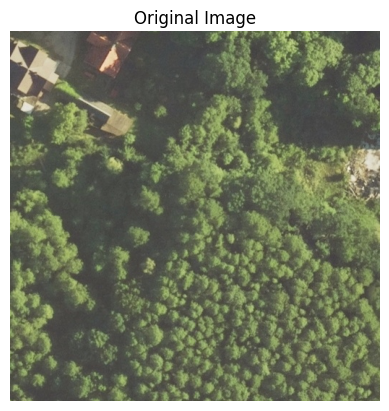

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Example test image path
sample_image_path = '/content/drive/MyDrive/Land-Cover-Semantic-Segmentation-PyTorch-main/data/patches_512/images/M-33-20-D-d-3-3_patch_8_7.tif'

# Read and preprocess
test_image = cv2.imread(sample_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.imshow(test_image)
plt.title("Original Image")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
from torchvision import transforms

# Apply same preprocessing as training
normalized_image = normalization_function(test_image)
input_tensor = torch.from_numpy(normalized_image).permute(2, 0, 1).unsqueeze(0).float().to('cuda')


In [ ]:
with torch.no_grad():
    predicted_mask = loaded_model(input_tensor)

# Convert back to CPU & numpy
predicted_mask = predicted_mask.squeeze().cpu().numpy()


In [ ]:
predicted_mask = np.argmax(predicted_mask, axis=0)


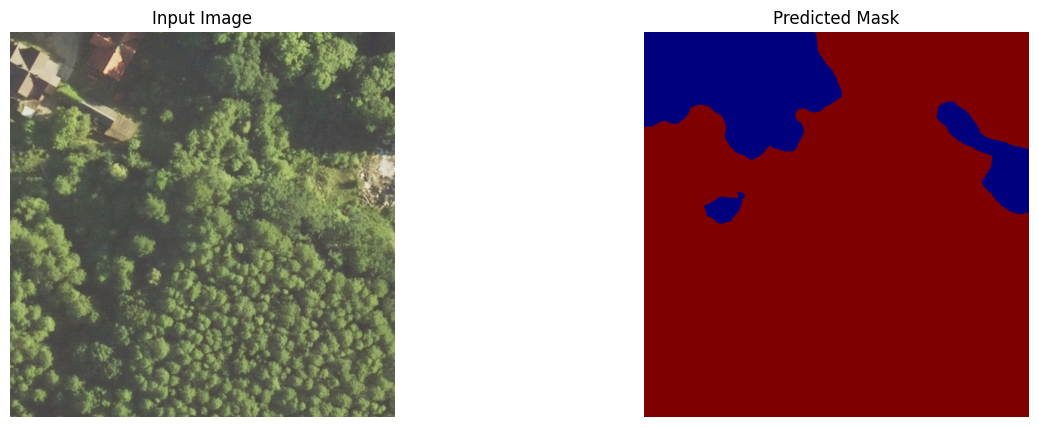

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.imshow(test_image)
plt.title("Input Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(predicted_mask, cmap='jet')
plt.title("Predicted Mask")
plt.axis('off')

plt.show()


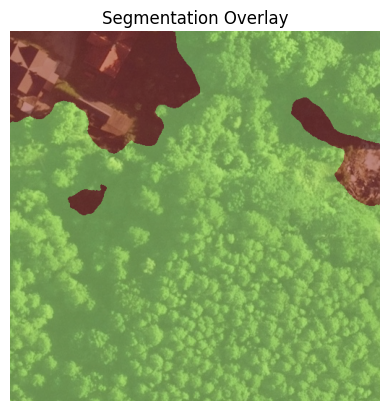

In [ ]:
overlay_image = test_image.copy()
colored_segmentation = cv2.applyColorMap((predicted_mask * 60).astype(np.uint8), cv2.COLORMAP_JET)
blended_result = cv2.addWeighted(overlay_image, 0.6, colored_segmentation, 0.4, 0)

plt.imshow(blended_result)
plt.title("Segmentation Overlay")
plt.axis('off')
plt.show()


In [ ]:
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.utils import metrics, losses

# --- Loss ---
# remove "mode='multiclass'"
combined_loss = losses.DiceLoss() + losses.CrossEntropyLoss()

# --- Metrics ---
evaluation_metrics = [
    metrics.IoU(threshold=0.5),
    metrics.Fscore(threshold=0.5),
    metrics.Precision(threshold=0.5),
    metrics.Recall(threshold=0.5),
]

# --- Epoch Runners ---
training_epoch = smp.utils.train.TrainEpoch(
    model=loaded_model,
    loss=combined_loss,
    metrics=evaluation_metrics,
    optimizer=model_optimizer,
    device=COMPUTE_DEVICE,
    verbose=True,
)

validation_epoch = smp.utils.train.ValidEpoch(
    model=loaded_model,
    loss=combined_loss,
    metrics=evaluation_metrics,
    device=COMPUTE_DEVICE,
    verbose=True,
)


🖼️ Selected test image: /content/drive/MyDrive/patches_512/images/N-34-140-A-d-3-4_patch_13_16.tif


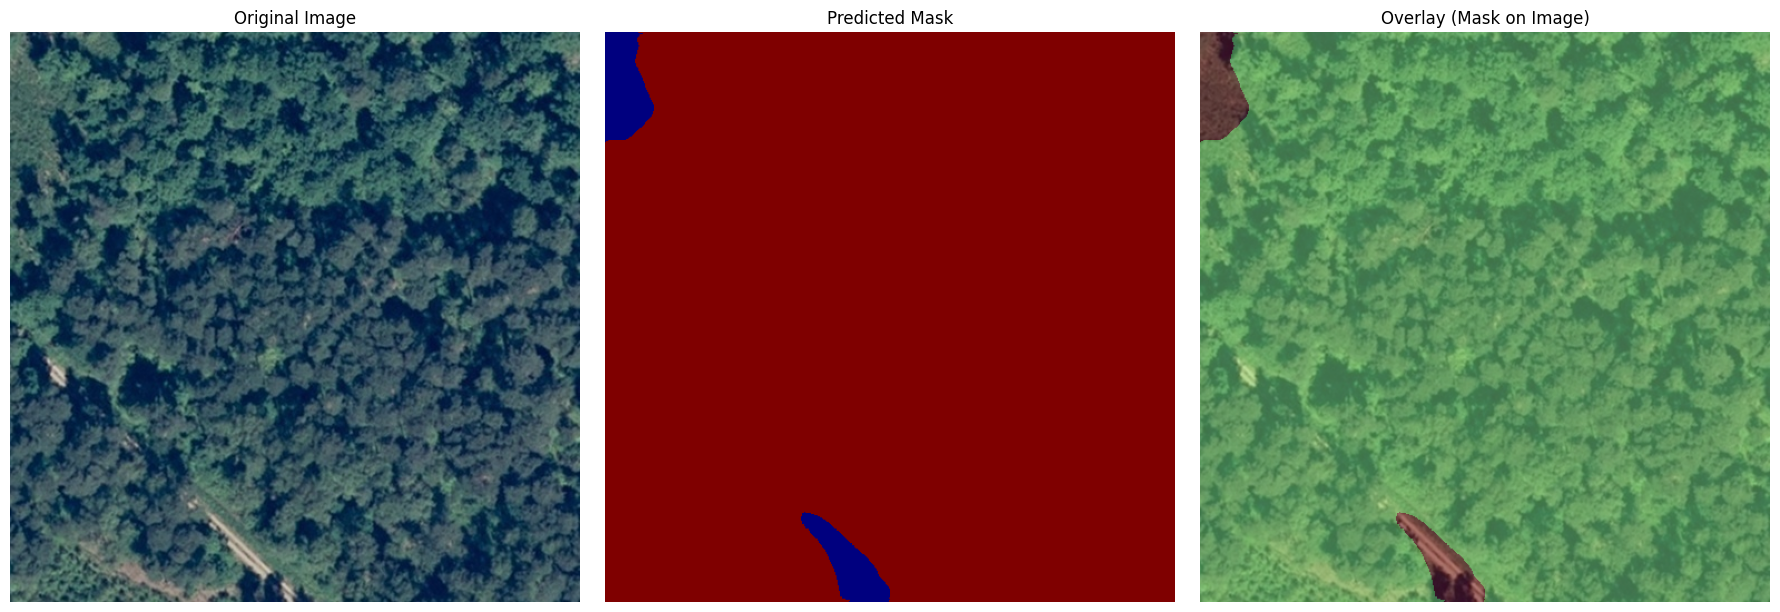

In [ ]:
import os, random, cv2, torch, numpy as np
import matplotlib.pyplot as plt

# --- Path to your image patches ---
patches_dir = "/content/drive/MyDrive/patches_512/images"

# Pick a random image from folder
img_files = [f for f in os.listdir(patches_dir) if f.endswith('.tif')]
test_img_path = os.path.join(patches_dir, random.choice(img_files))
print("Selected test image:", test_img_path)

# --- Load image safely ---
image = cv2.imread(test_img_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {test_img_path}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Preprocess same as training ---
preprocessed = preprocessing_fn(image)
x_tensor = torch.from_numpy(preprocessed).permute(2,0,1).unsqueeze(0).float().to(DEVICE)

# --- Inference ---
model.eval()
with torch.no_grad():
    pr_mask = model(x_tensor)

# --- Postprocess prediction ---
pr_mask = pr_mask.squeeze().cpu().numpy()
pr_mask = np.argmax(pr_mask, axis=0)  # softmax → class indices

# --- Create overlay ---
color_mask = cv2.applyColorMap((pr_mask * 60).astype(np.uint8), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(image, 0.6, color_mask, 0.4, 0)

# --- Display results ---
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(image); plt.title('Original Image'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(pr_mask, cmap='jet'); plt.title('Predicted Mask'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(overlay); plt.title('Overlay (Mask on Image)'); plt.axis('off')
plt.tight_layout(); plt.show()


In [ ]:
import torch
import segmentation_models_pytorch as smp
from torch.serialization import add_safe_globals

COMPUTE_DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Allowlist Unet class for PyTorch 2.6+
add_safe_globals([smp.Unet])

pretrained_model_filepath = '/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/landcover_unet_efficientnet-b0_epochs0_patch512_batch16.pth'

# ✅ Load full model object
inference_model = torch.load(pretrained_model_filepath, map_location=COMPUTE_DEVICE, weights_only=False)
inference_model.to(COMPUTE_DEVICE)
inference_model.eval()

print("✅ Loaded full pretrained U-Net model successfully!")


✅ Loaded full pretrained U-Net model successfully!


In [ ]:
# Run this once after loading full model
model_weights_filepath = '/content/drive/MyDrive/Colab Notebooks/Personal_Projects/Image Segmentation/Landcover Semantic Segmentation/landcover_unet_efficientnet-b0_epochs0_patch512_batch16.pth'

torch.save(inference_model.state_dict(), model_weights_filepath)


In [68]:
model = smp.Unet(
    encoder_name='efficientnet-b0',
    encoder_weights=None,
    classes=4,
    activation='softmax2d'
).to(DEVICE)
model.load_state_dict(torch.load(weights_path, map_location=DEVICE))
model.eval()


Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_expand_conv): Identity()
        (_bn0): Identity()
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identit